# 2020-01-21 UT Preliminary Analysis

In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
from imaka.analysis import plot_stats
from astropy.table import Table
import numpy as np
from importlib import reload
from imaka.reduce.nights import reduce_2020_01_21 as redu

reload(redu)
reload(plot_stats)

root_dir = "/g/lu/data/imaka/onaga/20200121/sta/"
print("Root directory:",root_dir)
stats_dir = root_dir + "reduce/stats/"
plots_dir = root_dir + "reduce/plots/"
stack_dir = root_dir + "reduce/stacks/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Root directory: /g/lu/data/imaka/onaga/20200121/sta/


# Data Reduction

Fully reduce the data from 20180526 UT. Don't re-run this unless you really need to as it takes awhile. After you re-run the data reduction, please remember to load it back up to onaga.

In [9]:
"""Set the appropriate root directory for your machine"""
redu.root_dir = root_dir

""""Make sky and flat images and use them to reduce science images"""
#redu.make_sky() #using frames from HR2286 to make sky images
#redu.make_flat()  # Using flat from 20181223
redu.reduce_FLD2()

# """"Find stars in clean images and calculate stats"""
# redu.find_stars_FLD2()
# redu.calc_star_stats()

# """"Make a stack of images for each mode and analyze stacks"""
# redu.stack_FLD2()
# redu.analyze_stacks()

Working on file:  /g/lu/data/imaka/onaga/20200121/sta/Beehive-W/sta003_o.fits
(5280, 5760)
(5280, 5072)
Working on file:  /g/lu/data/imaka/onaga/20200121/sta/Beehive-W/sta004_o.fits
(5280, 5760)
(5280, 5072)
Working on file:  /g/lu/data/imaka/onaga/20200121/sta/Beehive-W/sta005_o.fits
(5280, 5760)
(5280, 5072)
Working on file:  /g/lu/data/imaka/onaga/20200121/sta/Beehive-W/sta007_o.fits
(5280, 5760)
(5280, 5072)
Working on file:  /g/lu/data/imaka/onaga/20200121/sta/Beehive-W/sta009_o.fits
(5280, 5760)
(5280, 5072)
Working on file:  /g/lu/data/imaka/onaga/20200121/sta/Beehive-W/sta011_o.fits
(5280, 5760)
(5280, 5072)


KeyboardInterrupt: 

In [6]:
import pdb
pdb.pm()

> /u/caylananderson/code/python/imaka/imaka/reduce/reduce_fli.py(156)clean_single_image()
-> img = img / flat
(Pdb) type(flat)
<class 'numpy.ndarray'>
(Pdb) print(flat)
[[ 0.00336051  0.00315316  0.00325007 ...  0.00748053  0.00715301
   0.00410167]
 [ 0.00346491  0.00329931  0.00334193 ...  0.00698158  0.00694006
   0.003427  ]
 [ 0.00336013  0.00350733  0.00370636 ...  0.00757337  0.00672101
   0.00268728]
 ...
 [ 0.00430809  0.00472847  0.00471856 ...  0.00570217  0.00422939
  -0.00150326]
 [ 0.00446127  0.00484291  0.00495939 ...  0.00451162  0.00473551
  -0.00176718]
 [ 0.00200077  0.00190906  0.00194078 ...  0.00401693  0.00371521
  -0.00285539]]
(Pdb) plt.imshow(flat)
(Pdb) exity
*** NameError: name 'exity' is not defined
(Pdb) exit


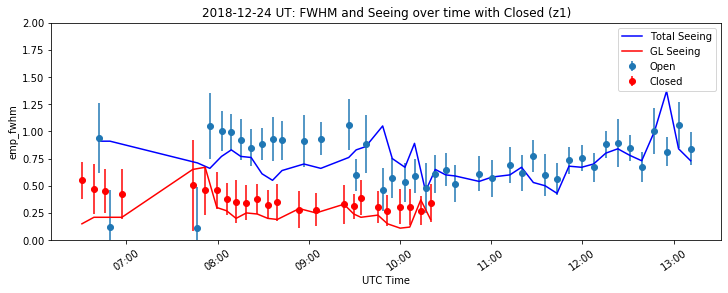

In [4]:
open_file = stats_dir +"stats_open_mdp.fits"
closed_file3 = stats_dir+ "stats_closed_z1_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file3, 'emp_fwhm', "2018-12-24 UT: FWHM and Seeing over time with Closed (z1)", plots_dir)

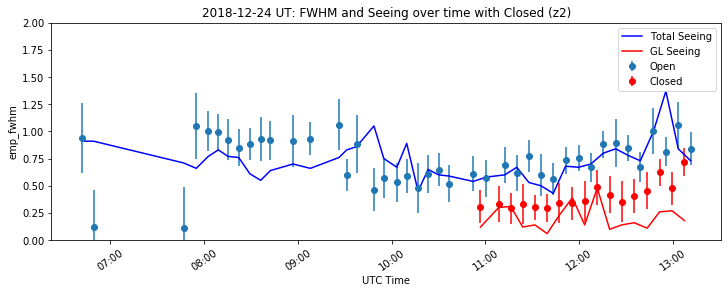

In [5]:
open_file = stats_dir +"stats_open_mdp.fits"
closed_file4 = stats_dir+ "stats_closed_z2_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file4, 'emp_fwhm', "2018-12-24 UT: FWHM and Seeing over time with Closed (z2)", plots_dir)

# Aggregate Plots

/u/caylananderson/code/python/imaka/imaka/analysis/plot_stats.py:1863: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(131)
/u/caylananderson/code/python/imaka/imaka/analysis/plot_stats.py:1870: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(132)
/u/caylananderson/code/python/imaka/imaka/analysis/plot_stats.py:1878: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes curr

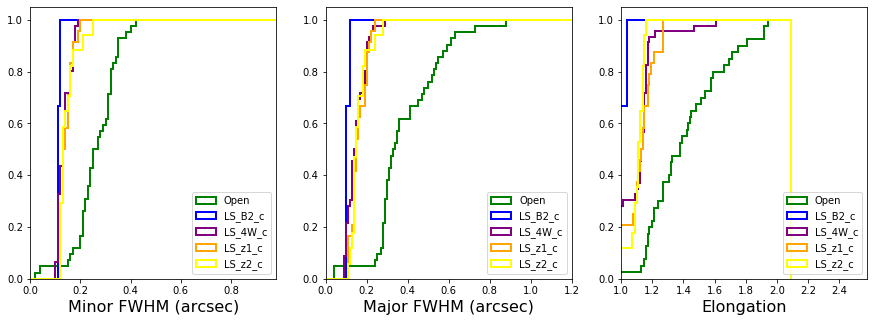

In [6]:
files = [open_file, closed_file1, closed_file2, closed_file3, closed_file4]
labels = ['Open', 'LS_B2_c', 'LS_4W_c', 'LS_z1_c', 'LS_z2_c']
colors = ['g', 'b', 'purple', 'orange', 'yellow']
plot_stats.comp_cdf(files, labels, colors)

# Field Variability

### Closed (B2)

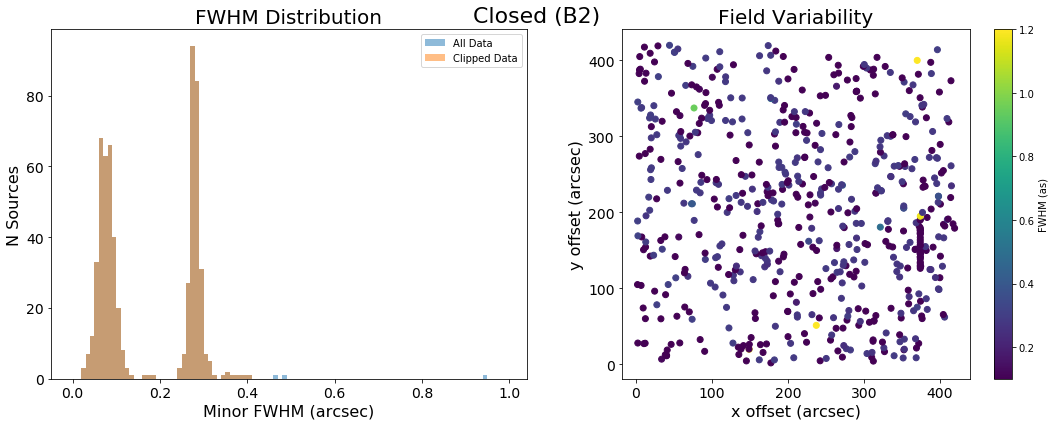

In [7]:
img_file = stack_dir + 'orion_stack_closed_B2.fits' 
starlist = stack_dir + 'orion_stack_closed_B2_stars.txt'
plot_stats.plot_var(img_file, starlist, "Closed (B2)")
#plot_stats.plot_field_var(starlist)
#plot_stats.plot_var_minmax(img_file, starlist, "Closed (B2)", xmin=0.5, xmax=0.7)

### Closed (4W)

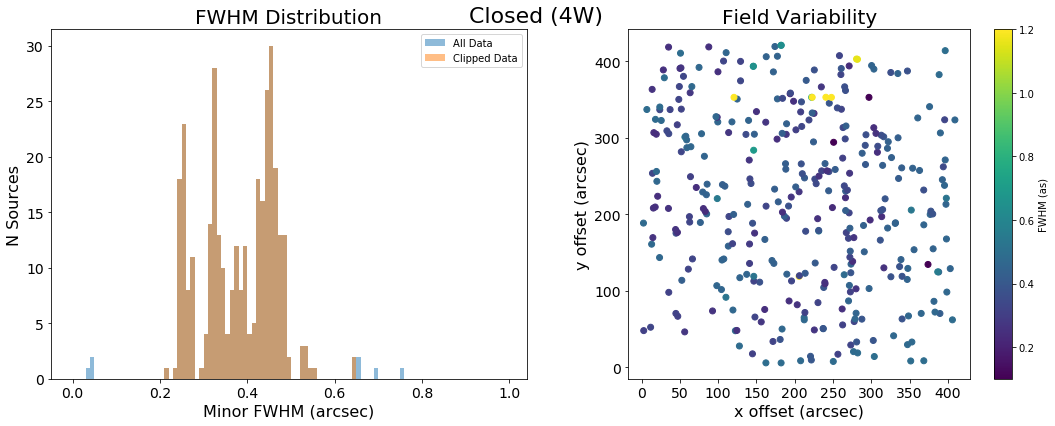

In [8]:
img_file = stack_dir + "orion_stack_closed_4W.fits"
starlist = stack_dir + "orion_stack_closed_4W_stars.txt"
plot_stats.plot_var(img_file, starlist, "Closed (4W)")
#plot_stats.plot_field_var(starlist)
#plot_stats.plot_var_minmax(img_file, starlist, "Closed (LS)", xmin=0.72, xmax=0.88)

### Closed (z1)

/u/caylananderson/code/python/imaka/imaka/analysis/plot_stats.py:1924: RuntimeWarning: invalid value encountered in sqrt
  FWHM = 2*abs(m.width_y.value)*np.sqrt((2**(1/m.power.value))-1)*0.08
/u/caylananderson/code/python/imaka/imaka/analysis/plot_stats.py:1922: RuntimeWarning: invalid value encountered in sqrt
  FWHM = 2*abs(m.width_x.value)*np.sqrt((2**(1/m.power.value))-1)*0.08


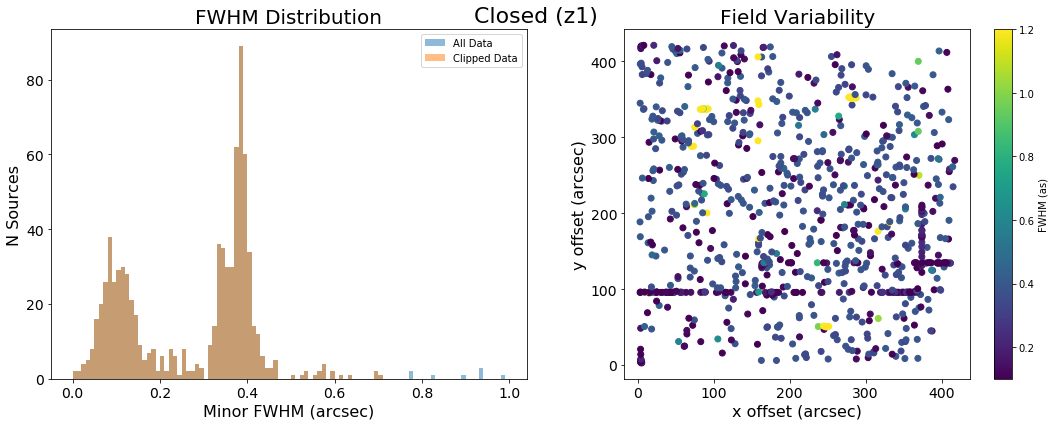

In [9]:
img_file = stack_dir + "orion_stack_closed_z1.fits"
starlist = stack_dir + "orion_stack_closed_z1_stars.txt"
plot_stats.plot_var(img_file, starlist, "Closed (z1)")

### Closed (z2)

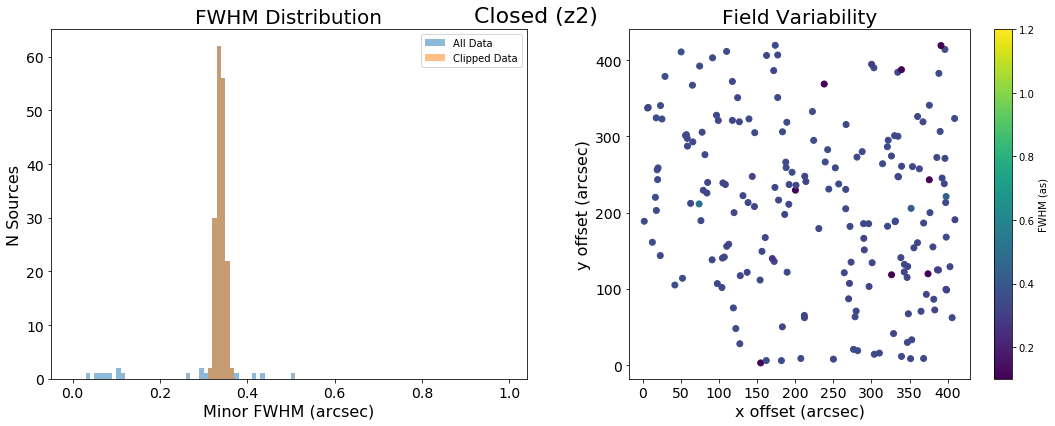

In [10]:
img_file = stack_dir + "orion_stack_closed_z2.fits"
starlist = stack_dir + "orion_stack_closed_z2_stars.txt"
plot_stats.plot_var(img_file, starlist, "Closed (z2)")

### Open

In [ ]:
# No data for open dome in stacks dir 
#img_file = stack_dir + "orion_stack_open.fits"
# starlist = stack_dir + "orion_stack_open_stars.txt"
# plot_stats.plot_var_minmax(img_file, starlist, "Open", xmin=0.85, xmax=1)